In [ ]:
!cp /content/drive/MyDrive/BCICIV_2a_gdf.zip /content/
!unzip /content/BCICIV_2a_gdf.zip -d data

Archive:  /content/BCICIV_2a_gdf.zip
  inflating: data/A01E.gdf           
  inflating: data/A01T.gdf           
  inflating: data/A02E.gdf           
  inflating: data/A02T.gdf           
  inflating: data/A03E.gdf           
  inflating: data/A03T.gdf           
  inflating: data/A04E.gdf           
  inflating: data/A04T.gdf           
  inflating: data/A05E.gdf           
  inflating: data/A05T.gdf           
  inflating: data/A06E.gdf           
  inflating: data/A06T.gdf           
  inflating: data/A07E.gdf           
  inflating: data/A07T.gdf           
  inflating: data/A08E.gdf           
  inflating: data/A08T.gdf           
  inflating: data/A09E.gdf           
  inflating: data/A09T.gdf           


In [ ]:
!cp /content/drive/MyDrive/fnirs.zip /content/
!unzip /content/fnirs.zip -d data

Archive:  /content/fnirs.zip
   creating: data/fnirs/
  inflating: data/fnirs/S01.mat      
  inflating: data/fnirs/S02.mat      
  inflating: data/fnirs/S03.mat      
  inflating: data/fnirs/S04.mat      
  inflating: data/fnirs/S05.mat      
  inflating: data/fnirs/S06.mat      
  inflating: data/fnirs/S07.mat      
  inflating: data/fnirs/S08.mat      


In [ ]:
!pip install --upgrade mne
!pip install numpy==1.25


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.25.0 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.0 which is incompatible.


In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80

In [ ]:
import numpy as np
import mne
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pycaret.classification import *
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score


eeg_raw = mne.io.read_raw_gdf("/content/data/A05T.gdf", preload=True)
eeg_events, _ = mne.events_from_annotations(eeg_raw)
eeg_data = eeg_raw.get_data()


event_id = dict(Left=7, Right=8, Foot=9, Tongue=10)
epochs = mne.Epochs(eeg_raw, eeg_events, event_id, tmin=0, tmax=2, baseline=None, preload=True)
labels = epochs.events[:, -1]
features = epochs.get_data()
print(" eeg_features shape:", features.shape)
print("eeg_Labels shape:", labels.shape)

Extracting EDF parameters from /content/data/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 686119  =      0.000 ...  2744.476 secs...
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 501 original time points ...
0 bad epochs dropped
 eeg_features shape: (288, 25, 501)
eeg_Labels shape: (288,)


In [ ]:
# 3. Load fNIRS Data (.mat)
mat = scipy.io.loadmat("/content/data/fnirs/S08.mat")
fnirs_data = mat['data']  # shape (samples, channels)
# Load the inner content
trial_1_data = fnirs_data[0, 0][0, 0]  # (array, fs, trials, labels, classes)

# Unpack the 5-tuple
fnirs_signals, fs, trial_indices, fnirs_labels, class_names = trial_1_data

# Now flatten the labels
fnirs_labels = fnirs_labels.flatten()

# Sanity check
print("fNIRS signals shape:", fnirs_signals.shape)
print("Labels shape:", fnirs_labels.shape)

fNIRS signals shape: (2726, 156)
Labels shape: (12,)


In [ ]:
from sklearn.decomposition import PCA
X_eeg_flattened = features.reshape(features.shape[0], -1)
X_eeg_scaled = StandardScaler().fit_transform(X_eeg_flattened)

In [ ]:
# 5. Preprocessing fNIRS
X_fnirs_scaled = StandardScaler().fit_transform(fnirs_signals)
pca_fnirs = PCA(n_components=4)
X_fnirs_pca = pca_fnirs.fit_transform(X_fnirs_scaled)


# 6. Align trials (assume both have 288 trials)
X_eeg_final = X_eeg_scaled[:288]
X_fnirs_final = X_fnirs_pca[:288]
labels_final = labels[:288]

In [ ]:
X_fused = np.concatenate((X_eeg_final, X_fnirs_final), axis=1)

In [ ]:
X_train, X_test, y_train_split, y_test_split = train_test_split(
    X_fused, labels_final, test_size=0.2, random_state=42, stratify=labels_final
)

# Train set
df_train = pd.DataFrame(X_train)
df_train['target'] = y_train_split

# Test set
df_test = pd.DataFrame(X_test)
df_test['target'] = y_test_split

# Setup on train data
s = setup(df_train, target='target')
# Evaluate on test set
# Compare top 10 models by AUC score
best_models = compare_models(include = ['lr','knn','ridge','dt','svm','nb','rf'])


,Description,Value
0,Session id,5311
1,Target,target
2,Target type,Multiclass
3,Target mapping,"7: 0, 8: 1, 9: 2, 10: 3"
4,Original data shape,"(230, 12530)"
5,Transformed data shape,"(230, 12530)"
6,Transformed train set shape,"(161, 12530)"
7,Transformed test set shape,"(69, 12530)"
8,Numeric features,12529
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7460,0.9224,0.7460,0.7709,0.7353,0.6613,0.6740,2.5250
ridge,Ridge Classifier,0.6474,0.0000,0.6474,0.6769,0.6364,0.5285,0.5423,2.8140
lr,Logistic Regression,0.6404,0.0000,0.6404,0.6650,0.6312,0.5195,0.5300,5.2390
svm,SVM - Linear Kernel,0.6279,0.0000,0.6279,0.6722,0.6163,0.5031,0.5154,3.5420
dt,Decision Tree Classifier,0.5287,0.6849,0.5287,0.5158,0.5061,0.3702,0.3802,4.8410
knn,K Neighbors Classifier,0.4857,0.7076,0.4857,0.5276,0.4760,0.3130,0.3243,2.8870
nb,Naive Bayes,0.4732,0.6965,0.4732,0.4896,0.4320,0.2985,0.3236,1.8970


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:34:48
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: 

In [ ]:
# 10. Deep Learning - CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Fit the encoder to the original labels and transform them
y_train_encoded = encoder.fit_transform(y_train_split)
y_test_encoded = encoder.transform(y_test_split)

cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_fused.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy' if labels are one-hot encoded
    metrics=['accuracy']
)


# CNN model
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



cnn_model.fit(X_train_cnn, y_train_encoded, validation_data=(X_test_cnn, y_test_encoded), epochs=100)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 652ms/step - accuracy: 0.2616 - loss: 17.8605 - val_accuracy: 0.3276 - val_loss: 15.9101
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 461ms/step - accuracy: 0.4382 - loss: 10.2423 - val_accuracy: 0.4310 - val_loss: 2.4129
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step - accuracy: 0.5332 - loss: 1.6100 - val_accuracy: 0.3448 - val_loss: 1.9084
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 568ms/step - accuracy: 0.6951 - loss: 0.6755 - val_accuracy: 0.4138 - val_loss: 1.8195
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 513ms/step - accuracy: 0.7827 - loss: 0.4824 - val_accuracy: 0.3966 - val_loss: 1.6309
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step - accuracy: 0.8665 - loss: 0.2878 - val_accuracy: 0.4483 - val_loss: 1.7007
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 542ms/step - accuracy: 0.9378 - loss: 0.2183 - val_accuracy: 0.5172 - val_loss: 1.4027
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 435ms/step - accuracy: 0.9432 - loss: 0.1793 - val_accuracy: 0.5862 

In [ ]:
loss, accuracy1 = cnn_model.evaluate(X_test_cnn, y_test_encoded)
loss, accuracy2 = cnn_model.evaluate(X_train_cnn, y_train_encoded)
print(f"🔹 CNN Test Accuracy using the raw data: {accuracy1:.4f}")
print(f"🔹 CNN Train Accuracy using the raw data: {accuracy2:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.5772 - loss: 1.5113
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 1.0000 - loss: 0.0015
🔹 CNN Test Accuracy using the raw data: 0.5690
🔹 CNN Train Accuracy using the raw data: 1.0000


In [ ]:
pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data shapes
feature_dim = X_fused.shape[1]  # total features (EEG + fNIRS)
num_classes = len(np.unique(labels_final)) + 1         # e.g., 2 classes
latent_dim = 100                              # latent noise vector

# Convert to tensors
real_data = torch.tensor(X_fused, dtype=torch.float32).to(device)
real_labels = torch.tensor(labels_final, dtype=torch.long).to(device)


In [ ]:
class Generator(nn.Module):
    def __init__(self, latent_dim, label_dim, output_dim):
        super(Generator, self).__init__()
        self.label_emb = nn.Embedding(num_classes, label_dim)
        self.model = nn.Sequential(
            nn.Linear(latent_dim + label_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, output_dim),
        )

    def forward(self, noise, labels):
        label_input = self.label_emb(labels)
        x = torch.cat((noise, label_input), dim=1)
        return self.model(x)

import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, input_dim, num_labels=11, embedding_dim=50, hidden_dim=128):
        super(Discriminator, self).__init__()
        self.label_embedding = nn.Embedding(num_labels, embedding_dim)  # 11 = labels 0 to 10
        self.model = nn.Sequential(
            nn.Linear(input_dim + embedding_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )

    def forward(self, x, labels):
        embedded_labels = self.label_embedding(labels)
        d_in = torch.cat((x, embedded_labels), dim=1)
        return self.model(d_in)



In [ ]:
# Hyperparameters
lr = 0.00002
epochs = 10000
batch_size = 64

# Models
generator = Generator(latent_dim, label_dim=10, output_dim=feature_dim).to(device)
discriminator = Discriminator(input_dim=X_fused.shape[1], num_labels=11)

# Optimizers
optim_G = torch.optim.Adam(generator.parameters(), lr=lr)
optim_D = torch.optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

# Training loop
for epoch in range(epochs):
    idx = np.random.randint(0, real_data.shape[0], batch_size)
    real_samples = real_data[idx]
    real_y = real_labels[idx]

    # Real and fake labels
    valid = torch.ones((batch_size, 1), device=device)
    fake = torch.zeros((batch_size, 1), device=device)

    # Train Generator
    optim_G.zero_grad()
    z = torch.randn(batch_size, latent_dim).to(device)
    gen_labels = torch.randint(0, num_classes, (batch_size,), device=device)
    gen_samples = generator(z, gen_labels)
    validity = discriminator(gen_samples, gen_labels)
    g_loss = criterion(validity, valid)
    g_loss.backward()
    optim_G.step()

    # Train Discriminator
    optim_D.zero_grad()
    real_pred = discriminator(real_samples, real_y)
    real_loss = criterion(real_pred, valid)

    fake_pred = discriminator(gen_samples.detach(), gen_labels)
    fake_loss = criterion(fake_pred, fake)

    d_loss = (real_loss + fake_loss) / 2
    d_loss.backward()
    optim_D.step()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")


Epoch 0 | D Loss: 0.7492 | G Loss: 0.6842
Epoch 1000 | D Loss: 0.1398 | G Loss: 1.4660
Epoch 2000 | D Loss: 0.0435 | G Loss: 2.5790
Epoch 3000 | D Loss: 0.0140 | G Loss: 3.6832
Epoch 4000 | D Loss: 0.0068 | G Loss: 4.3780
Epoch 5000 | D Loss: 0.0029 | G Loss: 5.2368
Epoch 6000 | D Loss: 0.0014 | G Loss: 6.0048
Epoch 7000 | D Loss: 0.0006 | G Loss: 6.7493
Epoch 8000 | D Loss: 0.0003 | G Loss: 7.4189
Epoch 9000 | D Loss: 0.0002 | G Loss: 7.9171


In [ ]:
# Number of synthetic samples per class
n_synthetic_per_class = 100
synthetic_features = []
synthetic_labels = []

for class_label in range(num_classes):
    z = torch.randn(n_synthetic_per_class, latent_dim).to(device)
    y = torch.full((n_synthetic_per_class,), class_label, dtype=torch.long).to(device)
    gen_data = generator(z, y).detach().cpu().numpy()

    synthetic_features.append(gen_data)
    synthetic_labels.append(y.cpu().numpy())

# Concatenate synthetic data
X_synthetic = np.vstack(synthetic_features)
y_synthetic = np.hstack(synthetic_labels)

print("Synthetic Data Shape:", X_synthetic.shape)


Synthetic Data Shape: (500, 12529)


In [ ]:
X_combined = np.vstack((X_fused, X_synthetic))
y_combined = np.hstack((labels_final, y_synthetic))
df_combined = pd.DataFrame(X_combined)
df_combined['target'] = y_combined

# Now use this for classification (SVM, RandomForest, or deep learning)


In [ ]:
from pycaret.classification import *

# Setup PyCaret
clf_setup = setup(data=df_combined, target='target')

# Compare models
best_model = compare_models()

# Evaluate best model
evaluate_model(best_model)

# Confusion Matrix & ROC
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='auc')

# Predict and get accuracy
predictions = predict_model(best_model)


,Description,Value
0,Session id,6712
1,Target,target
2,Target type,Multiclass
3,Target mapping,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 7: 5, 8: 6, 9: 7, 10: 8"
4,Original data shape,"(788, 12530)"
5,Transformed data shape,"(788, 12530)"
6,Transformed train set shape,"(551, 12530)"
7,Transformed test set shape,"(237, 12530)"
8,Numeric features,12529
9,Preprocess,True


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:28:29
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7260,0.0000,0.7260,0.7448,0.7214,0.6906,0.6933,15.5390
svm,SVM - Linear Kernel,0.7062,0.0000,0.7062,0.7321,0.7030,0.6678,0.6717,3.5040
rf,Random Forest Classifier,0.6661,0.9400,0.6661,0.6832,0.6579,0.6232,0.6270,5.4790
nb,Naive Bayes,0.5264,0.8265,0.5264,0.5703,0.5101,0.4655,0.4749,2.2690
ridge,Ridge Classifier,0.5210,0.0000,0.5210,0.5398,0.4774,0.4531,0.4663,2.1170
dt,Decision Tree Classifier,0.4049,0.6638,0.4049,0.4243,0.3933,0.3283,0.3316,6.6960
ada,Ada Boost Classifier,0.3556,0.0000,0.3556,0.4363,0.3542,0.2728,0.2782,42.1480
knn,K Neighbors Classifier,0.2922,0.6397,0.2922,0.2729,0.2669,0.1893,0.2073,2.2310
qda,Quadratic Discriminant Analysis,0.1688,0.0000,0.1688,0.1661,0.1566,0.0542,0.0552,2.9750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

In [ ]:
# 10. Deep Learning - CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Fit the encoder to the original labels and transform them
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

num_classes = len(np.unique(y_train_encoded))

cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_combined.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # or 'categorical_crossentropy' if labels are one-hot encoded
    metrics=['accuracy']
)


# CNN model
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)



cnn_model.fit(X_train_cnn, y_train_encoded, validation_data=(X_test_cnn, y_test_encoded), epochs=100)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 514ms/step - accuracy: 0.1801 - loss: 5.4488 - val_accuracy: 0.3038 - val_loss: 2.2198
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 472ms/step - accuracy: 0.4136 - loss: 1.5883 - val_accuracy: 0.3861 - val_loss: 1.5464
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 412ms/step - accuracy: 0.5128 - loss: 1.2169 - val_accuracy: 0.5127 - val_loss: 1.5282
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 494ms/step - accuracy: 0.6581 - loss: 0.9602 - val_accuracy: 0.5127 - val_loss: 1.3011
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 483ms/step - accuracy: 0.7308 - loss: 0.8769 - val_accuracy: 0.5823 - val_loss: 1.2867
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 395ms/step - accuracy: 0.7548 - loss: 0.7451 - val_accuracy: 0.5570 - val_loss: 1.2577
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 494ms/step - accuracy: 0.7234 - loss: 0.7600 - val_accuracy: 0.6076 - val_loss: 1.1966
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 526ms/step - accuracy: 0.7873 - loss: 0.6482 - va

In [ ]:
loss,accuracy1 = cnn_model.evaluate(X_test_cnn, y_test_encoded)
loss,accuracy2 = cnn_model.evaluate(X_train_cnn, y_train_encoded)
print(f"🔹 CNN Test Accuracy using the raw data: {accuracy1:.4f}")
print(f"🔹 CNN Train Accuracy using the raw data: {accuracy2:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7239 - loss: 1.1418
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 1.0000 - loss: 0.0029
🔹 CNN Test Accuracy using the raw data: 0.7342
🔹 CNN Train Accuracy using the raw data: 1.0000


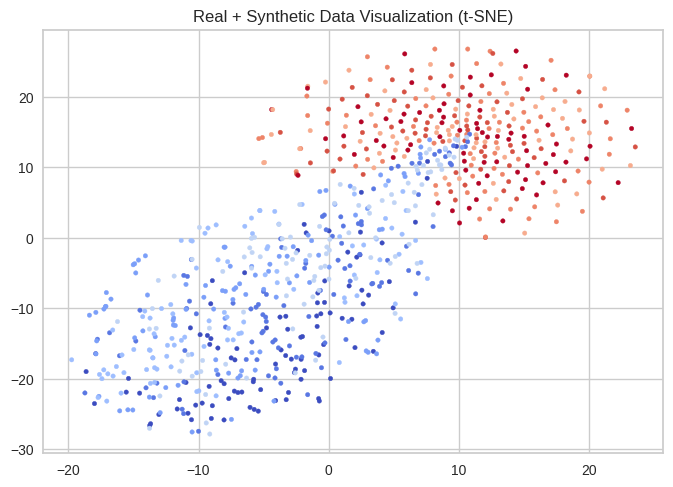

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

X_vis = TSNE(n_components=2, random_state=42).fit_transform(X_combined)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_combined, cmap='coolwarm', s=10)
plt.title("Real + Synthetic Data Visualization (t-SNE)")
plt.show()
